In [ ]:
!pip install pandas
!pip install oauth2client gspread

import time
import datetime
import random
import hashlib
import hmac
import base64
import io
import json
import os
import sys
import tkinter as tk
from tkinter import ttk, filedialog
import requests
from bs4 import BeautifulSoup
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from tkinter import messagebox


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = Signature.generate(timestamp, method, uri, secret_key)

    return {'Content-Type': 'application/json; charset=UTF-8', 'X-Timestamp': timestamp,
            'X-API-KEY': api_key, 'X-Customer': str(customer_id), 'X-Signature': signature}

class Signature:

    @staticmethod
    def generate(timestamp, method, uri, secret_key):
        message = "{}.{}.{}".format(timestamp, method, uri)
        hash = hmac.new(bytes(secret_key, "utf-8"),
                        bytes(message, "utf-8"), hashlib.sha256)

        hash.hexdigest()
        return base64.b64encode(hash.digest())

def getresults(hintKeywords, API_KEY, SECRET_KEY, CUSTOMER_ID):

    BASE_URL = 'https://api.naver.com'
#     global API_KEY
#     global SECRET_KEY
#     global CUSTOMER_ID

    uri = '/keywordstool'
    method = 'GET'

    params = {}

    params['hintKeywords'] = hintKeywords
    params['showDetail'] = '1'

    r = requests.get(BASE_URL + uri, params=params,
                     headers=get_header(method, uri, API_KEY, SECRET_KEY, CUSTOMER_ID))

    return pd.DataFrame(r.json()['keywordList'])

# 네이버 광고

- 1단계 - https://manage.searchad.naver.com/
- 2단계 - 도구 클릭 > API 사용 관리

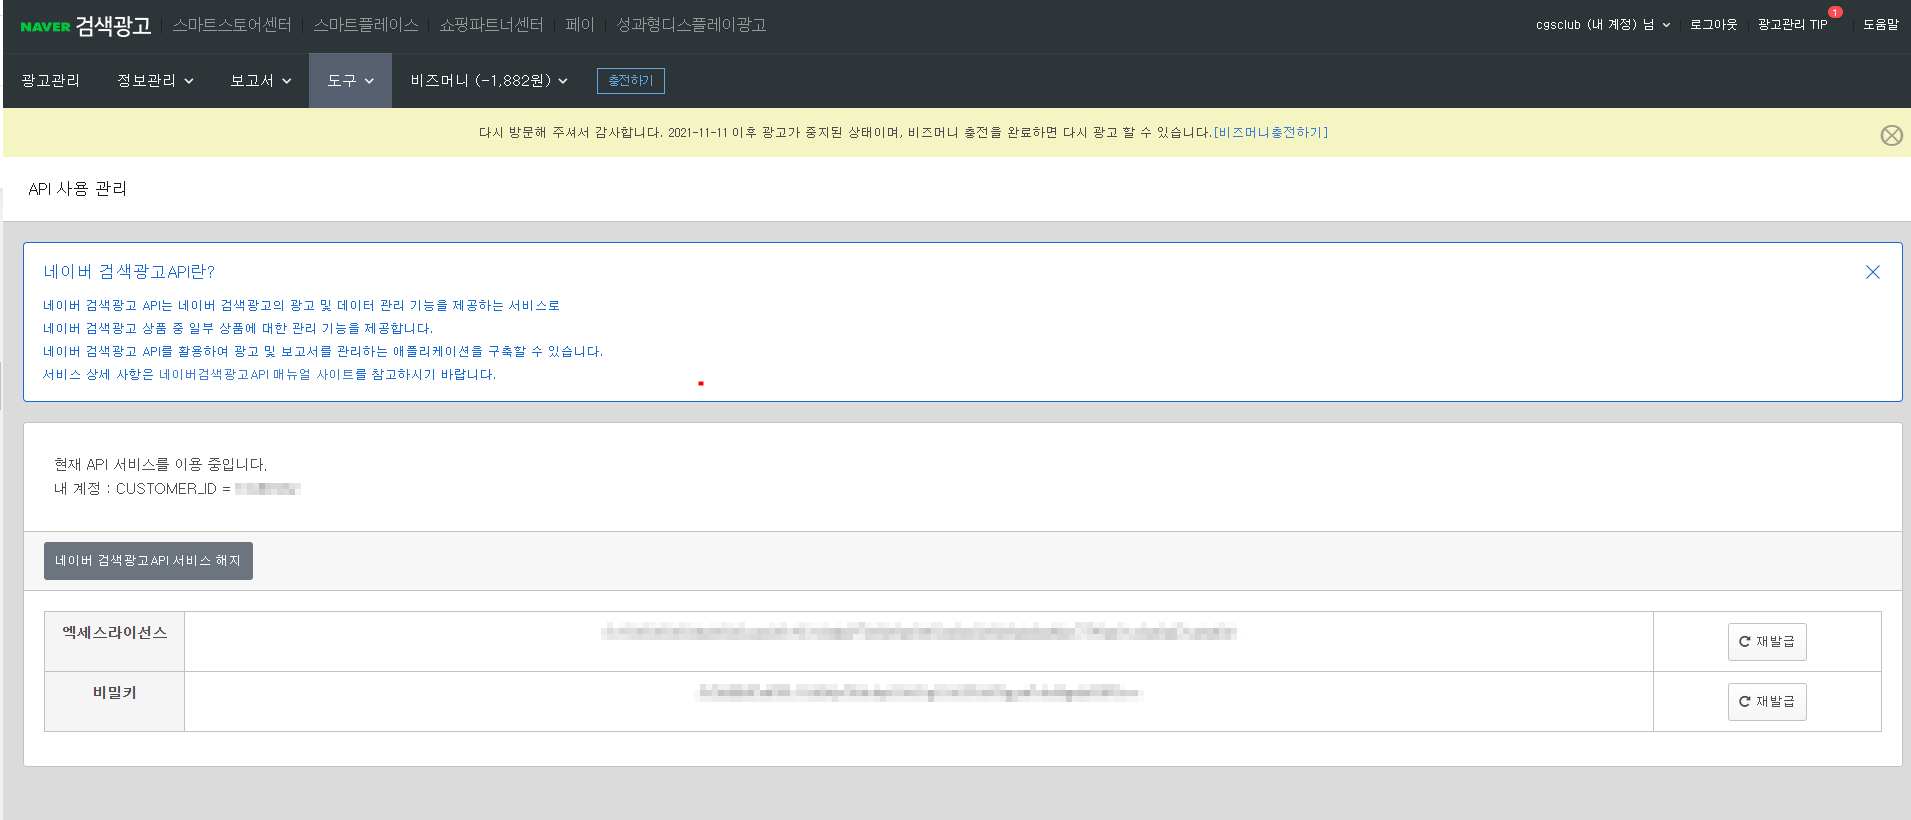

In [ ]:
import getpass
s_api_key=getpass.getpass('엑세스라이선스:')
s_SECRET_KEY=getpass.getpass('비밀키:')
s_CUSTOMER_ID=getpass.getpass('CUSTOMER_ID:')

getresults('파이썬',s_api_key,s_SECRET_KEY,s_CUSTOMER_ID)

엑세스라이선스:··········
비밀키:··········
CUSTOMER_ID:··········


relKeyword monthlyPcQcCnt monthlyMobileQcCnt  monthlyAvePcClkCnt  \
0            파이썬          27500              21800                 9.8   
1         파이썬호스팅             10               < 10                 1.2   
2          파이썬인강            150                260                 5.1   
3           스크래치          31400              21700                25.0   
4          GPU서버            250                100                 3.3   
...          ...            ...                ...                 ...   
1195  IT국비지원무료교육           < 10               < 10                 0.0   
1196    국비지원IT교육             10                 10                 0.3   
1197     웹개발국비지원            180                200                 0.8   
1198     영등포직업학교           < 10                 10                 0.0   
1199      청주IT학원             10                 10                 0.2   

      monthlyAveMobileClkCnt  monthlyAvePcCtr  monthlyAveMobileCtr  \
0                       49.0             0.04                 0.24   
1                        0.3            11.12                 4.17   
2                       17.4             3.41                 6.99   
3                      131.5             0.09                 0.65   
4                        1.4             1.34                 1.36   
...                      ...              ...                  ...   
1195                     0.5             0.00                10.00   
1196                     1.0             3.04                 7.15   
1197                     5.2             0.45                 2.76   
1198                     0.0             0.00                 0.00   
1199                     0.8             2.02                 8.34   

      plAvgDepth compIdx  
0              8      중간  
1              4      낮음  
2             15      높음  
3             14      높음  
4             13      중간  
...          ...     ...  
1195          15      높음  
1196          15      높음  
1197          13      중간  
1198           2      낮음  
1199          15      높음  

[1200 rows x 9 columns]